In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [39]:
num = 1000
x = 6. * (np.arange(num, dtype=np.float64) + 0.5) / np.float64(num)

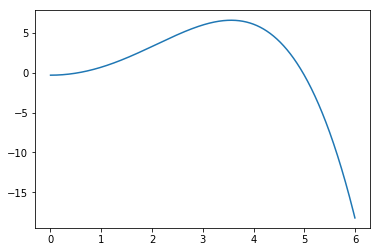

In [40]:
plt.plot(x, func(x))

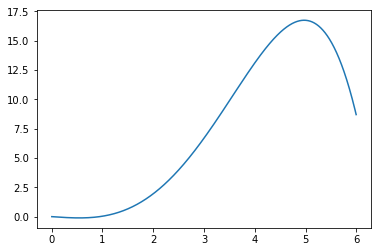

In [41]:
plt.plot(x, func_integral(x))

In [47]:
range = [0., 5.]
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)

In [48]:
traps_weights = np.ones(num, dtype=np.float64)
traps_weights[0] = traps_weights[0] * 0.5
traps_weights[-1] = traps_weights[-1] * 0.5

In [49]:
print(traps_weights)

[ 0.5  1.   1.  ...,  1.   1.   0.5]


In [50]:
traps_integral = (func(x) * traps_weights * dx).sum()
print(traps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(traps_integral - real_integral)
print((traps_integral - real_integral) / real_integral)

16.7291432292
16.729166666666664
-2.34374947929e-05
-1.40099595275e-06


In [54]:
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

In [55]:
print(simps_weights)

[ 0.33333333  1.33333333  0.66666667 ...,  0.66666667  1.33333333
  0.33333333]


In [56]:
simps_integral = (func(x) * simps_weights * dx).sum()
print(simps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(simps_integral - real_integral)
print((simps_integral - real_integral) / real_integral)

16.7291666666
16.729166666666664
-2.08331130125e-11
-1.24531684259e-12


In [57]:
def func(x=None):
    return (np.exp(- x))

In [58]:
def func_rescale(xp=None, a=None):
    x = a * (1. + xp) / (1. - xp)
    weight = 2. * a / (1. - xp)**2
    return (weight * func(x=x))

In [59]:
num = 1001
range = np.array([-1., 1.], dtype=np.float64)
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num)
dx = (range[1] - range[0]) / np.float64(num)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

In [60]:
a = 0.1
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

6.43449737936e-11


In [61]:
a = 1.
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

5.55111512313e-15


In [62]:
a = 10.
simps_integral = (func_rescale(x, a=a) * simps_weights * dx).sum()
print(simps_integral - 1.)

7.52531370551e-12
